# Create and train a CNN

![cnn](https://i.imgflip.com/2n3h1m.jpg)

In [81]:
%%capture install_pandas

!pip install pandas
!pip install tqdm

In [82]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import os

In [83]:
DATA_DIRECTORY_DOGS = "./data/dogs/"
DATA_DIRECTORY_CATS = "./data/cats/"

SAMPLE_SIZE = 2000

DOGS = [ filename for filename in os.listdir(DATA_DIRECTORY_DOGS) if "jpg" in filename]
CATS = [ filename for filename in os.listdir(DATA_DIRECTORY_CATS) if "jpg" in filename]

CATS_SAMPLE = np.random.choice( CATS, size=int(SAMPLE_SIZE/2), replace=False)
DOGS_SAMPLE = np.random.choice( DOGS, size=int(SAMPLE_SIZE/2), replace=False)

CATS_SAMPLE_FULLPATH = [DATA_DIRECTORY_CATS + file for file in CATS_SAMPLE]
DOGS_SAMPLE_FULLPATH = [DATA_DIRECTORY_DOGS + file for file in DOGS_SAMPLE]

ANIMALS = CATS_SAMPLE_FULLPATH + DOGS_SAMPLE_FULLPATH
np.random.shuffle(ANIMALS)

In [84]:
from tqdm import tnrange
from tqdm.notebook import tqdm
from keras.preprocessing import image

images = []
labels = []

IMG_WIDTH_AND_HEIGHT = 100

for animal_path in tqdm(ANIMALS,desc="Loading Images",unit="images"):
    img = image.load_img(animal_path, grayscale=False, color_mode="rgb", target_size=(IMG_WIDTH_AND_HEIGHT,IMG_WIDTH_AND_HEIGHT) )
    img_label = np.array([1,0])
    if "dog" in animal_path:
        img_label = np.array([0,1])
    try:
        images.append( image.img_to_array(img)/255 ) 
        labels.append(img_label)
    except:
        pass

Loading Images:   0%|          | 0/2000 [00:00<?, ?images/s]

In [85]:
images_data=np.array(images)
class_labels=np.array(labels)

print(images_data.shape)

(2000, 100, 100, 3)


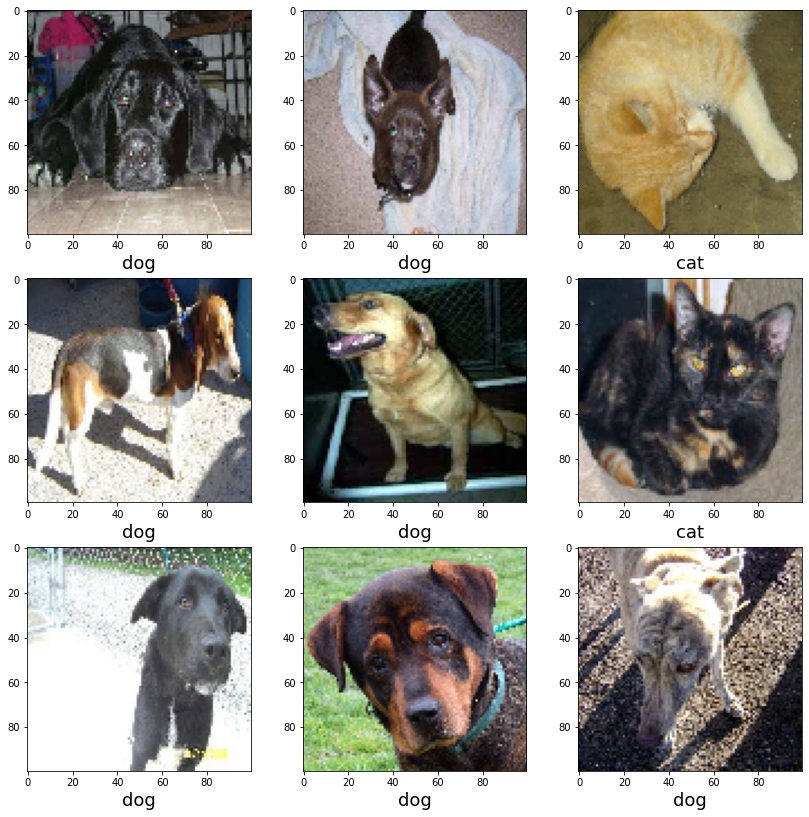

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(14,14))

random_labels = class_labels[:9]
random_images = images_data[:9]
random_labels_titles = [ "dog" if l[1] > 0 else "cat" for l in random_labels]

for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(random_images[i])
    plt.xlabel(random_labels_titles[i],fontsize=18)
plt.show()

In [87]:
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout,BatchNormalization,Activation

In [88]:
model=Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=32,activation="relu",input_shape=(IMG_WIDTH_AND_HEIGHT,IMG_WIDTH_AND_HEIGHT,3)))
model.add(Conv2D(kernel_size=(3,3),filters=32,activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(kernel_size=(3,3),filters=48,activation="relu"))
model.add(Conv2D(kernel_size=(3,3),filters=48,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(100,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 48)        13872     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 48)        20784     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 48)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 9408)             

In [89]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [93]:
loss_graph = model.fit(images_data,class_labels, validation_split=0.25, epochs=3, batch_size=150)

Epoch 1/3
10/10 [==============================] - 12s 1s/step - loss: 0.2900 - accuracy: 0.8780 - val_loss: 0.6348 - val_accuracy: 0.7280
Epoch 2/3
10/10 [==============================] - 11s 1s/step - loss: 0.2604 - accuracy: 0.8900 - val_loss: 0.7163 - val_accuracy: 0.7140
Epoch 3/3
10/10 [==============================] - 11s 1s/step - loss: 0.2725 - accuracy: 0.8860 - val_loss: 0.7692 - val_accuracy: 0.7100


<AxesSubplot:>

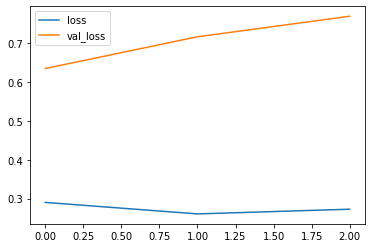

In [94]:
pd.DataFrame( loss_graph.history )[['loss', 'val_loss']].plot()

<AxesSubplot:>

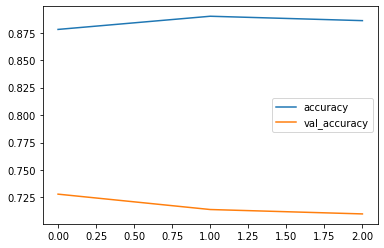

In [95]:
pd.DataFrame( loss_graph.history )[['accuracy', 'val_accuracy']].plot()